# 백준 14891(https://www.acmicpc.net/problem/14891)

총 8개의 톱니를 가지고 있는 톱니바퀴 4개가 아래 그림과 같이 일렬로 놓여져 있다. 또, 톱니는 N극 또는 S극 중 하나를 나타내고 있다. 톱니바퀴에는 번호가 매겨져 있는데, 가장 왼쪽 톱니바퀴가 1번, 그 오른쪽은 2번, 그 오른쪽은 3번, 가장 오른쪽 톱니바퀴는 4번이다.
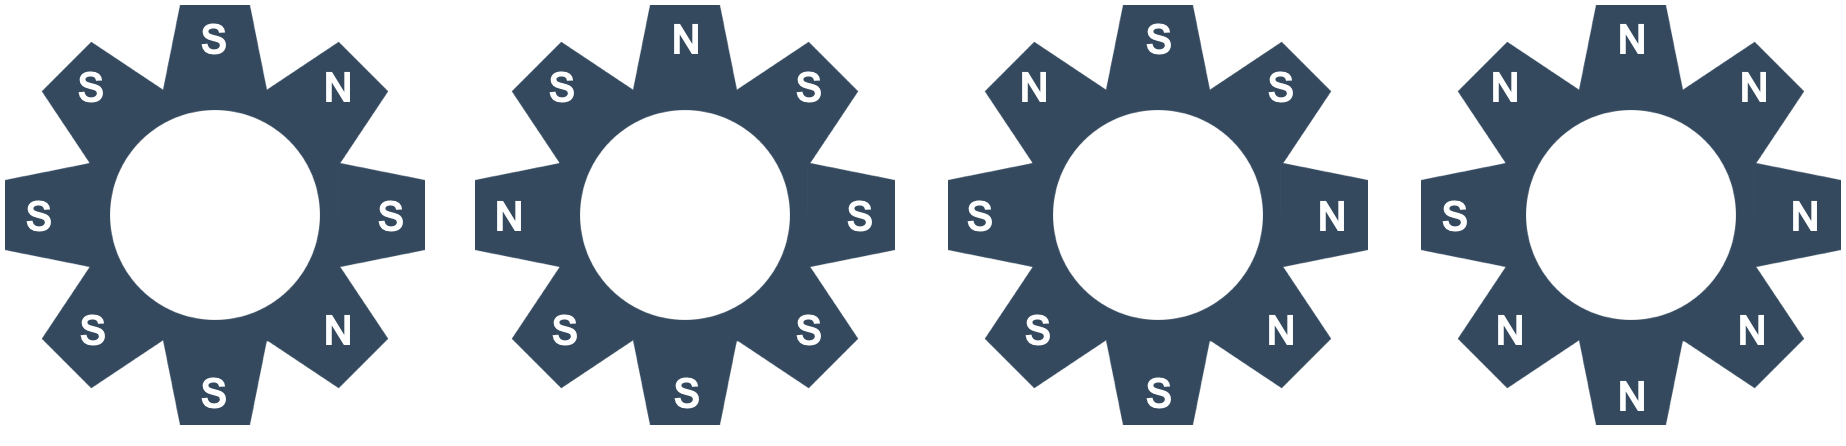
이때, 톱니바퀴를 총 K번 회전시키려고 한다. 톱니바퀴의 회전은 한 칸을 기준으로 한다. 회전은 시계 방향과 반시계 방향이 있고, 아래 그림과 같이 회전한다.
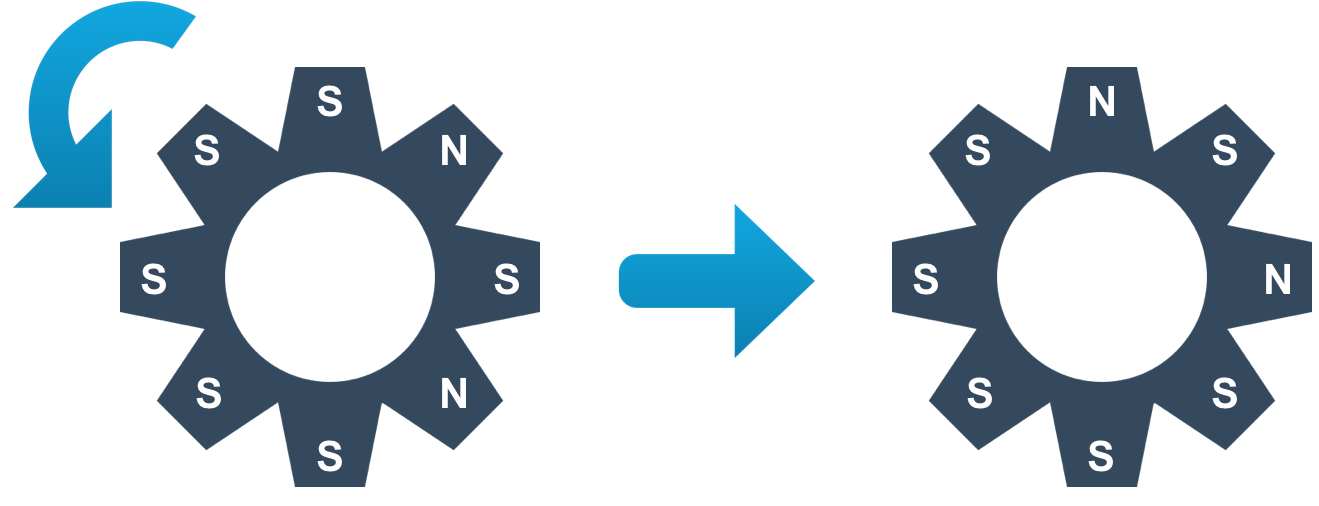
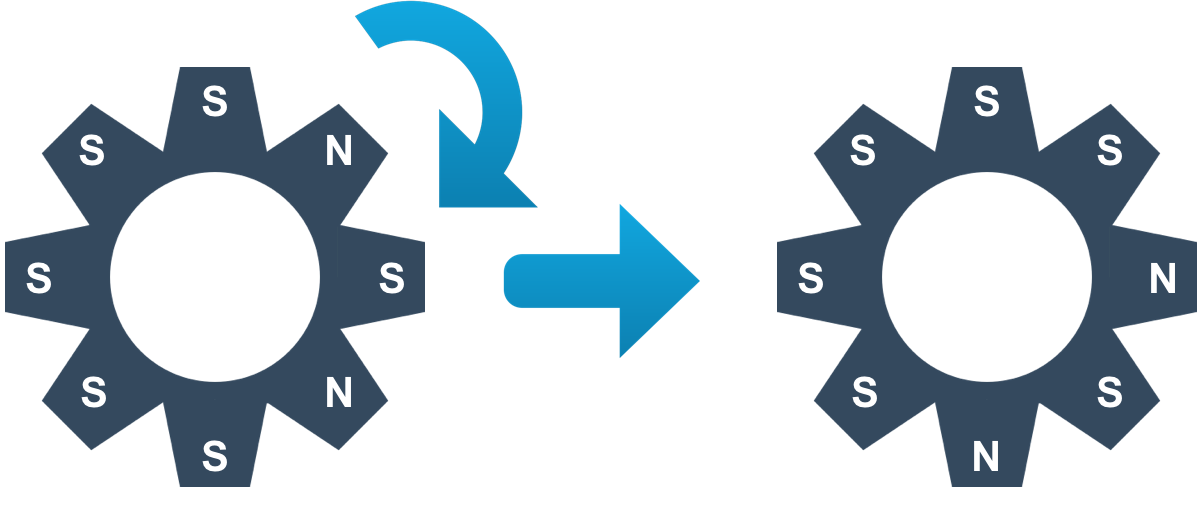
톱니바퀴를 회전시키려면, 회전시킬 톱니바퀴와 회전시킬 방향을 결정해야 한다. 톱니바퀴가 회전할 때, 서로 맞닿은 극에 따라서 옆에 있는 톱니바퀴를 회전시킬 수도 있고, 회전시키지 않을 수도 있다. 톱니바퀴 A를 회전할 때, 그 옆에 있는 톱니바퀴 B와 서로 맞닿은 톱니의 극이 다르다면, B는 A가 회전한 방향과 반대방향으로 회전하게 된다. 예를 들어, 아래와 같은 경우를 살펴보자.
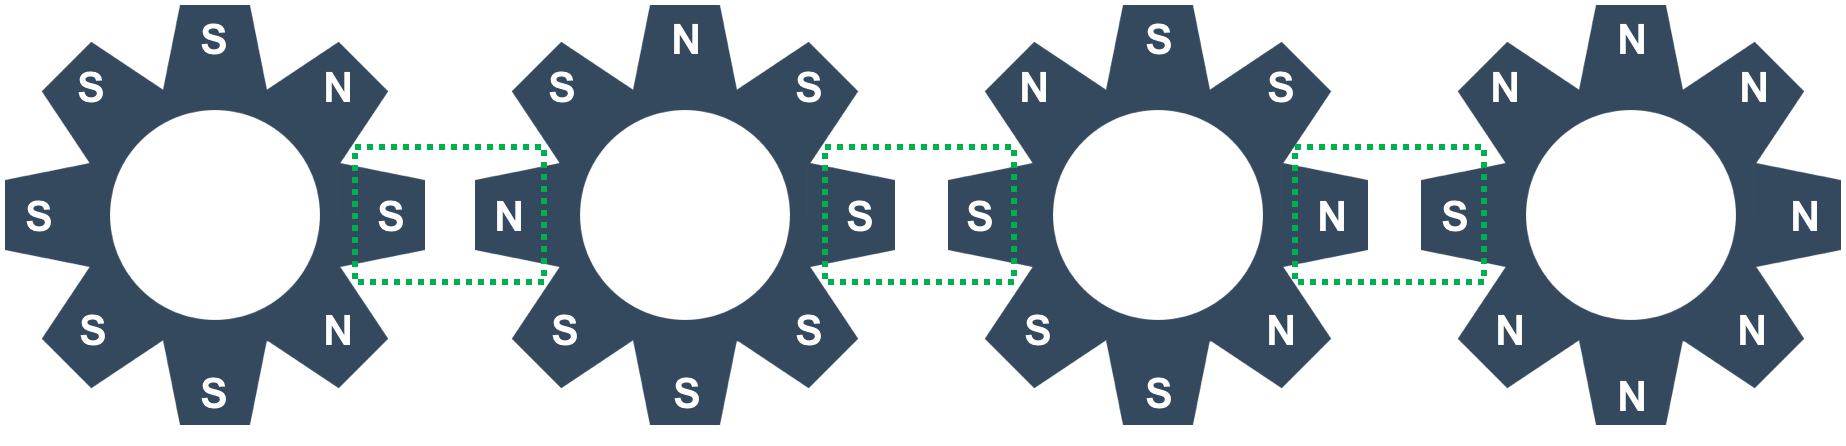
두 톱니바퀴의 맞닿은 부분은 초록색 점선으로 묶여있는 부분이다. 여기서, 3번 톱니바퀴를 반시계 방향으로 회전했다면, 4번 톱니바퀴는 시계 방향으로 회전하게 된다. 2번 톱니바퀴는 맞닿은 부분이 S극으로 서로 같기 때문에, 회전하지 않게 되고, 1번 톱니바퀴는 2번이 회전하지 않았기 때문에, 회전하지 않게 된다. 따라서, 아래 그림과 같은 모양을 만들게 된다.
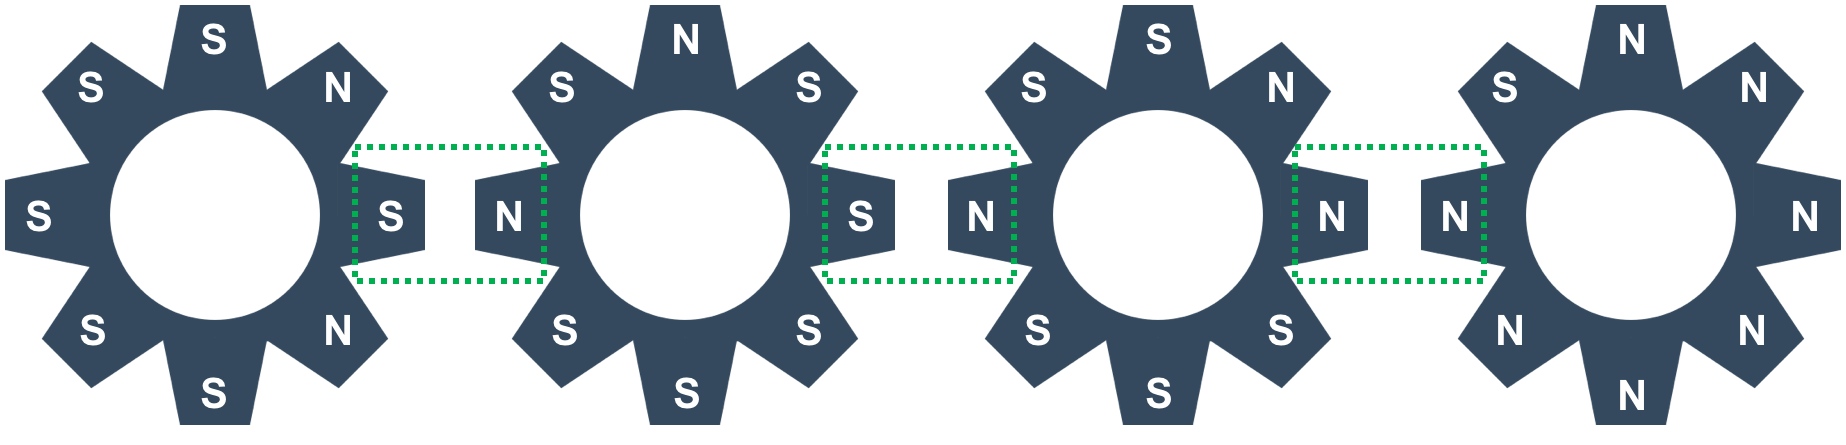
위와 같은 상태에서 1번 톱니바퀴를 시계 방향으로 회전시키면, 2번 톱니바퀴가 반시계 방향으로 회전하게 되고, 2번이 회전하기 때문에, 3번도 동시에 시계 방향으로 회전하게 된다. 4번은 3번이 회전하지만, 맞닿은 극이 같기 때문에 회전하지 않는다. 따라서, 아래와 같은 상태가 된다.
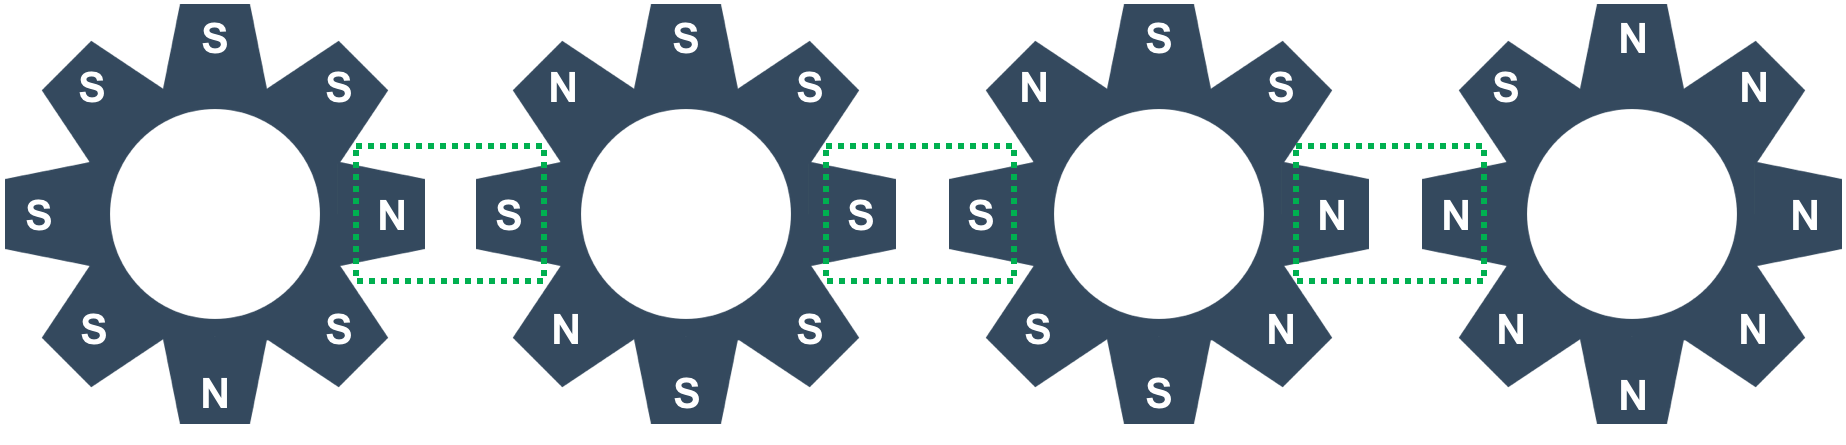
톱니바퀴의 초기 상태와 톱니바퀴를 회전시킨 방법이 주어졌을 때, 최종 톱니바퀴의 상태를 구하는 프로그램을 작성하시오.

> 입력: 첫째 줄에 1번 톱니바퀴의 상태, 둘째 줄에 2번 톱니바퀴의 상태, 셋째 줄에 3번 톱니바퀴의 상태, 넷째 줄에 4번 톱니바퀴의 상태가 주어진다. 상태는 8개의 정수로 이루어져 있고, 12시방향부터 시계방향 순서대로 주어진다. N극은 0, S극은 1로 나타나있다. 다섯째 줄에는 회전 횟수 K(1 ≤ K ≤ 100)가 주어진다. 다음 K개 줄에는 회전시킨 방법이 순서대로 주어진다. 각 방법은 두 개의 정수로 이루어져 있고, 첫 번째 정수는 회전시킨 톱니바퀴의 번호, 두 번째 정수는 방향이다. 방향이 1인 경우는 시계 방향이고, -1인 경우는 반시계 방향이다.

> 출력: 총 K번 회전시킨 이후에 네 톱니바퀴의 점수의 합을 출력한다. 점수란 다음과 같이 계산한다.
- 1번 톱니바퀴의 12시방향이 N극이면 0점, S극이면 1점
- 2번 톱니바퀴의 12시방향이 N극이면 0점, S극이면 2점
- 3번 톱니바퀴의 12시방향이 N극이면 0점, S극이면 4점
- 4번 톱니바퀴의 12시방향이 N극이면 0점, S극이면 8점

## 1. Python solution1

In [39]:
from collections import deque


# N극은 0. S극은 1
arr = [deque(list(map(int, input().strip()))) for _ in range(4)]

K = int(input())
for _ in range(K):
    r = [] # 톱니 상태 저장
    for i in range(4):
        r.append([arr[i][-2], arr[i][2]])
        
    n, d = map(int, input().split(' '))
    n -= 1 # 톱니 번호
    
    # 왼쪽에 있는 톱니 돌리기
    if n != 0:
        for i in range(n, 0, -1):
            if r[i][0] != r[i-1][1]: # 왼쪽의 톱니와 극이 다름
                if (n-(i-1)) % 2 != 0:
                    arr[i - 1].rotate(-1*d) # 현재와 다른 방향으로 회전
                elif (n-(i-1)) % 2 == 0:
                    arr[i - 1].rotate(d) # 현재와 같은 방향으로 회전
            elif r[i][0] == r[i-1][1]:
                break
                
    # 오른쪽에 있는 톱니 돌리기
    if n != 3:
        for i in range(n, 3):
            if r[i][1] != r[i+1][0]: # 오른쪽의 톱니와 극이 다름
                if (n-(i+1)) % 2 != 0:
                    arr[i + 1].rotate(-1*d) # 현재와 다른 방향으로 회전
                elif (n-(i+1)) % 2 == 0:
                    arr[i + 1].rotate(d) # 현재와 같은 방향으로 회전
            elif r[i][1] == r[i+1][0]:
                break
                
    arr[n].rotate(d)
    
result = 0
if arr[0][0] == 1:
    result += 1
if arr[1][0] == 1:
    result += 2
if arr[2][0] == 1:
    result += 4
if arr[3][0] == 1:
    result += 8
print(result)

11111111
11111111
11111111
11111111
3
1 1
2 1
3 1
15
